# Assignment: Intrusion detection

## Task:  Connection Classification

Kaggle challenge: https://www.kaggle.com/sampadab17/network-intrusion-detection?select=Train_data.csv

### Problem description
The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks.

## Data
A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes.
For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features) .The class variable has two categories:
• Normal
• Anomalous



## Task 1: Problem Statement
Discuss the problem setting and the first implcations of the given data set... 
* What assumptions can we make about the data?
* What problems are we expecting?

## Task 2: First Data Analysis, Cleaning and Feature Extraction
* Import the data to a Pandas DataFrame
* Run first simple statistics and visualizations
* Is there a need to clean the data? If yes, do so...
* Can you use the raw data directly, or should you extract features? What features are suitable ? 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Train_data.csv' , encoding = "ISO-8859-1")

In [3]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [4]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
data['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

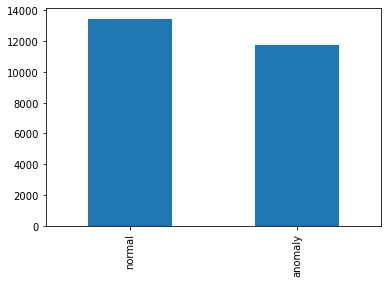

In [7]:
data['class'].value_counts().plot.bar();

In [8]:
#split dataset
normal = data[data['class']=='normal']
anormal = data[data['class']=='anomaly']

### protocol type

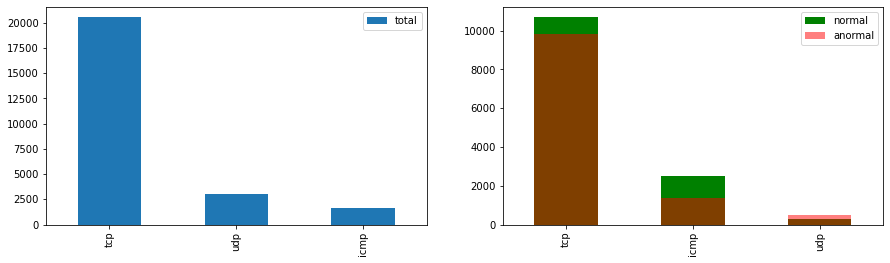

In [9]:
fig = plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
data['protocol_type'].value_counts().plot.bar(label="total")
plt.legend()

plt.subplot(1, 2, 2)
normal["protocol_type"].value_counts().plot(kind='bar',label='normal' ,color='green', alpha=1)
anormal["protocol_type"].value_counts().plot(kind='bar', label='anormal' , color='red', alpha=.5)
plt.legend()

plt.show()

### service

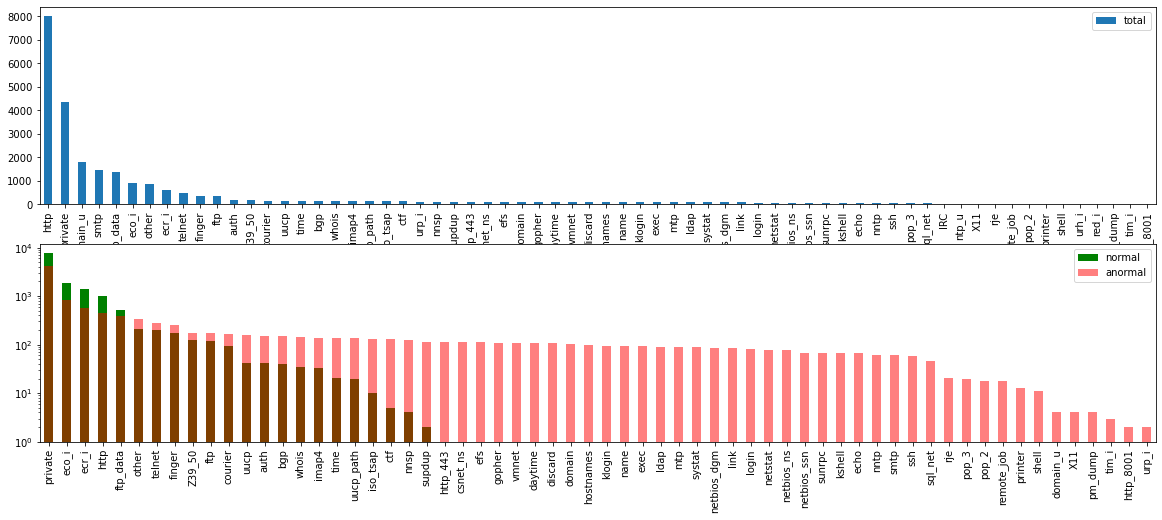

In [10]:
fig = plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
data['service'].value_counts().plot.bar(label='total')
plt.legend()

plt.subplot(2, 1, 2)
normal["service"].value_counts().plot(kind='bar',label='normal' ,color='green', alpha=1,  log=True )
anormal["service"].value_counts().plot(kind='bar', label='anormal' , color='red', alpha=0.5, log=True)
plt.legend()
plt.show()


### flag

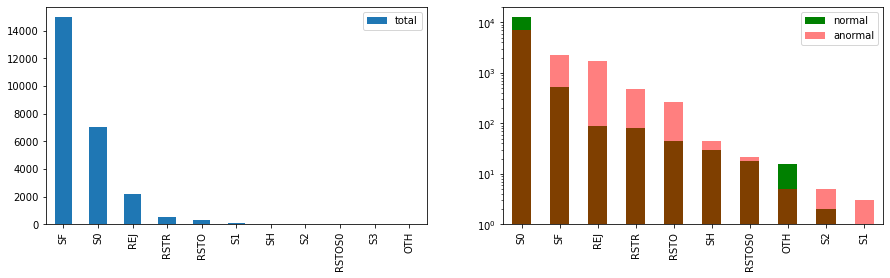

In [11]:
fig = plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
data['flag'].value_counts().plot.bar(label='total')
plt.legend()

plt.subplot(1, 2, 2)
normal["flag"].value_counts().plot(kind='bar',label='normal' ,color='green', alpha=1,log=True)
anormal["flag"].value_counts().plot(kind='bar', label='anormal' , color='red', alpha=.5, log=True)
plt.legend()
plt.show()

## Preprocessing

In [12]:
#encode/transform labels into values

from sklearn.preprocessing import LabelEncoder
data['protocol_type'] = LabelEncoder().fit_transform(data['protocol_type'])
data['service'] = LabelEncoder().fit_transform(data['service'])
data['flag'] = LabelEncoder().fit_transform(data['flag'])
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [13]:
data['class_num'] = data["class"].map({'normal':0, 'anomaly':1})
data.drop('class', axis=1, inplace=True)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_num
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,1,19,9,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,1,46,1,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,1,38,5,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


## Task 3: Train a  Model
* Which ML model would you choose and why?
 ---> Random Forest: because of the classification problem --> RF is rather slow but accurate and can handle the high dimensional spaces as well as the large number of training examples.
* Train and evaluate the model using the train data
* Is the data blanced? What are the implications, how can you deal with this?
--> i don't understand the question.
* Discuss the results -> possible improvements?
 maybe:  search better parameters --> define more possible params and increase the number of iterations for Randomized Search
 

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop('class_num', axis=1)
y = data['class_num']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import metrics
from sklearn.metrics import classification_report


In [16]:
model_params = {
    "n_estimators": randint(4,200),
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
    'min_samples_leaf': randint(1,4),
    'min_samples_split': randint(2,9)
}

rf_model = rfc(class_weight='balanced', n_jobs=-1)

clf = RandomizedSearchCV(rf_model, model_params, n_iter=10, cv=5, random_state=0)

In [17]:
model = clf.fit(X_train, y_train)

In [18]:
model.best_params_

{'max_depth': 60,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 199}

In [19]:
clf = model.best_estimator_
pred = clf.predict(X_test)

## Task 4: Evaluate 
* report the F1-Score on the test data - Who will build the bes model?

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [21]:
f1 = f1_score(y_test, pred)
print('F1:', f1)

F1: 0.9974597798475868


In [22]:
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test,pred)
rec = recall_score(y_test, pred)
print('Accuracy:', acc)
print('Precision', prec)
print('Recall', rec)

Accuracy: 0.9976185751141099
Precision 0.9987282746926663
Recall 0.9961945031712474


In [23]:
confusion_matrix(pred, y_test)

array([[2671,    9],
       [   3, 2356]], dtype=int64)